In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as creature
import matplotlib.path as mpath
import cmocean as co
import cartopy.mpl.ticker as cticker
import matplotlib.ticker as mticker
from pyproj import Transformer
import h5py
from netCDF4 import Dataset

theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

In [9]:
# bisicles output
bike = xr.open_dataset('/gws/nopw/j04/terrafirma/nicdet/explore/bike.nc')
bike_grid = xr.open_dataset('/gws/nopw/j04/terrafirma/nicdet/explore/cf_gridfile_BISICLES_lev2.nc')

In [12]:
prefix = bike.keys()
bike[prefix] = bike[prefix].where(bike[prefix]!=0)

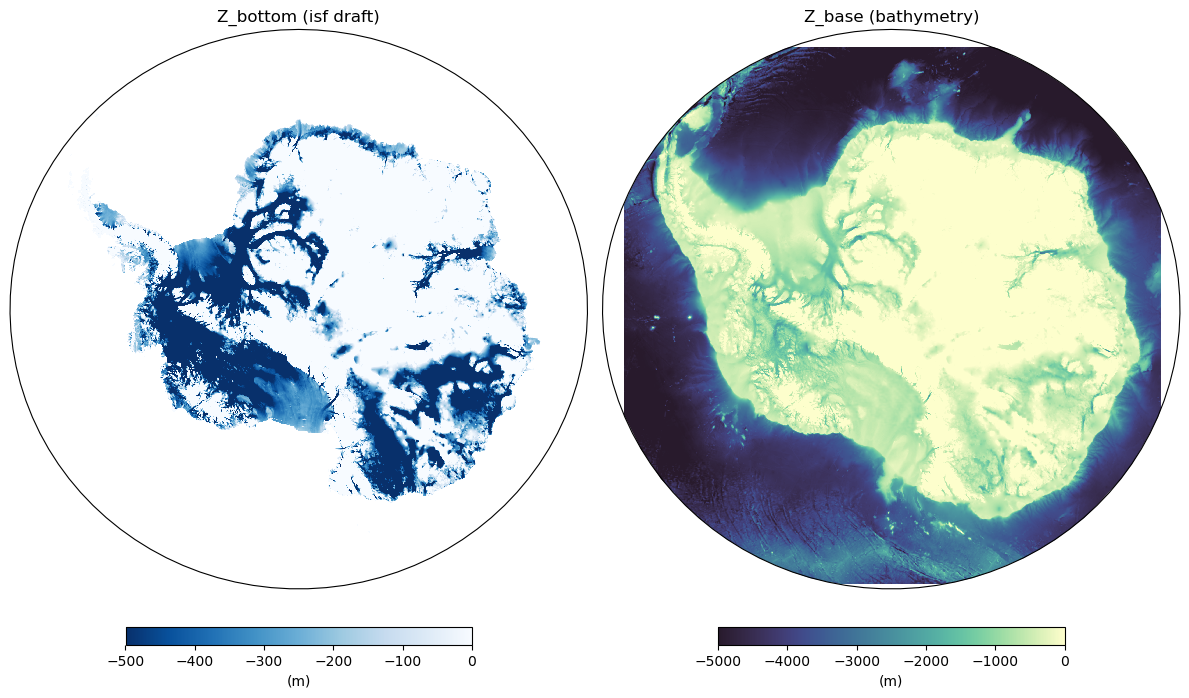

In [14]:
fig, axes = plt.subplots(1,2, subplot_kw={'projection': ccrs.SouthPolarStereo()}, figsize=(12, 8), layout='tight')

for ax in axes:
    ax.set_extent([160, -150, -90, -60], ccrs.PlateCarree())
#    ax.coastlines()
    ax.set_boundary(map_circle, transform=ax.transAxes)

a = axes[0].pcolormesh(bike_grid.longitude, bike_grid.latitude, bike.Z_bottom, transform=ccrs.PlateCarree(), cmap='Blues_r', vmin=-500, vmax=0)
axes[0].set_title('Z_bottom (isf draft)');

b = axes[1].pcolormesh(bike_grid.longitude, bike_grid.latitude, bike.Z_base, transform=ccrs.PlateCarree(), cmap=co.cm.deep_r, vmin=-5000, vmax=0)
axes[1].set_title('Z_base (bathymetry)');

cbar_a = fig.colorbar(a, ax=axes[0], orientation='horizontal', pad=0.05, shrink=.6)
cbar_a.set_label('(m)')

cbar_b = fig.colorbar(b, ax=axes[1], orientation='horizontal', pad=0.05, shrink=.6)
cbar_b.set_label('(m)');

In [67]:
epsg_global = 'epsg:4326'
epsg_AIS = 'epsg:3031'
x0 = -3072000
y0 = -3072000
inProj = epsg_AIS

outProj = epsg_global

y_2d, x_2d = np.meshgrid(bike.x, bike.y)
#x_1d = bike.x
#y_1d = bike.y

#dx = x_1d[1] - x_1d[0]
#dy = y_1d[1] - y_1d[0]
#y_2d, x_2d = np.meshgrid(y_1d[0]:y_1d[-1] + dy:dy, x_1d[0]:x_1d[-1] + dx:dx)

mfact = -1.

t = Transformer.from_crs(inProj, outProj, always_xy=True)
xl_2d, yl_2d = t.transform((x_2d + x0) * mfact, (y_2d + y0))

steph_offset = 90.
xl_2d = xl_2d + steph_offset